In [134]:
from autoseg.datasets import get_dataset_path
import zarr
from PIL import Image
import numpy as np

In [135]:
zarr = zarr.open(get_dataset_path("SynapseWeb/kh2015/oblique"))

In [136]:
img_arr = zarr["raw"]["s0"][:]

In [137]:
img_arr.shape

(91, 5752, 6012)

In [170]:
img_size = 512
z = 35
images = []
for i in range(5):
  image = img_arr[z, 2800:2800+img_size, 2700:2700+img_size]
  image = np.array(image)
  # make borders 9 pixels black
  image[:9, :] = 0
  image[-9:, :] = 0
  image[:, :9] = 0
  image[:, -9:] = 0
  image = Image.fromarray(image)

  image.save(f"images/sections/{i}.png")
  images.append(image)
  z += 1

In [171]:
img_size = [20, 512, 512]
center = [45, 2500, 3000]
# create three 2D images that are connected in their edges
# these images should be able to be stitched together to form a cube
# from a 2D perspective
faces = []
slices = []
for i in range(img_size[0]):
  arr_data = img_arr[center[0] - img_size[0]//2 + i, center[1] - img_size[1]//2: center[1] + img_size[1]//2, center[2] - img_size[2]//2: center[2] + img_size[2]//2]
  arr_data = np.array(arr_data)
  #slice = Image.fromarray(arr_data)
  slices.append(arr_data)


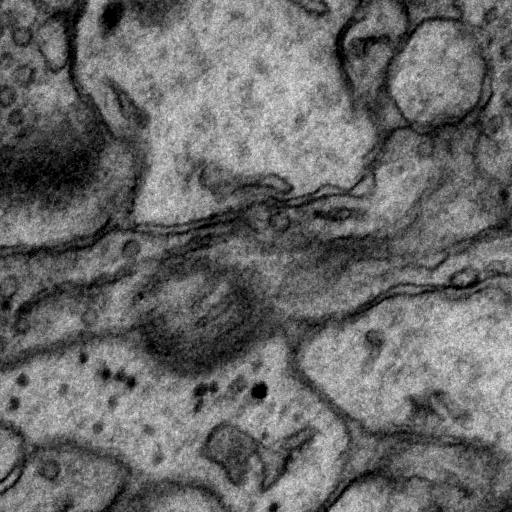

In [172]:
#for i in range(5):
#  slices[-1-i][:, 0:5] = 0
#  slices[-1-i][0:5, :] = 255
Image.fromarray(slices[-1]).rotate(90).show()
# black border at bottom
# white border at left

In [173]:
black_face = np.zeros((img_size[1], img_size[0]), dtype=np.uint8)
for i, slice in enumerate(slices):
  black_face[:, i] = slice[:, 0]

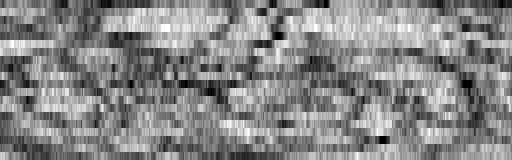

In [179]:
# black border on top
Image.fromarray(np.repeat(black_face, 8, axis=1)).rotate(90, expand=True).show()

In [181]:
white_face = np.zeros((img_size[1], img_size[0]), dtype=np.uint8)
for i, slice in enumerate(slices):
  white_face[:, i] = slice[0, :]

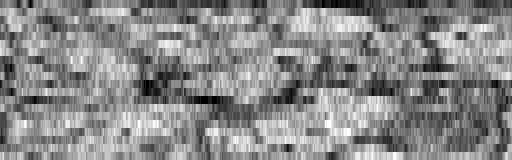

: 

In [182]:
# white border on top
Image.fromarray(np.repeat(white_face, 8, axis=1)).rotate(90, expand=True).show()